In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words

import regex as re
import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

In [2]:
telegraph = pd.read_csv("C:/Users/jw156/Ironhack/vaccine/vaccine_sentiment/english/telegraph.csv", index_col=0)
guardian = pd.read_csv("C:/Users/jw156/Ironhack/vaccine/vaccine_sentiment/english/guardian.csv", index_col=0)
independent = pd.read_csv("C:/Users/jw156/Ironhack/vaccine/vaccine_sentiment/english/independent.csv", index_col=0)

In [3]:
telegraph = telegraph.rename(columns={'times': 'date', 'hrefs': 'href'})

In [4]:
telegraph

,title,href,date
0,\nCoronavirus latest news: Joint EU-UK stateme...,https://www.telegraph.co.uk/global-health/scie...,"24 Mar 2021, 7:00pm"
1,\nEurope tightens Covid restrictions as 'third...,https://www.telegraph.co.uk/politics/2021/03/2...,"24 Mar 2021, 4:30pm"
2,\nPubs may demand Covid passport before they w...,https://www.telegraph.co.uk/politics/2021/03/2...,"24 Mar 2021, 6:36pm"
3,\nBoris Johnson warns EU that vaccine ban targ...,https://www.telegraph.co.uk/news/2021/03/24/eu...,"24 Mar 2021, 7:26pm"
4,\nLateral flow Covid testing too inaccurate to...,https://www.telegraph.co.uk/news/2021/03/24/la...,"24 Mar 2021, 6:34pm"
...,...,...,...
22390,\nChina's coronavirus outbreak proves we must ...,https://www.telegraph.co.uk/global-health/scie...,"24 Jan 2020, 2:33pm"
22391,\nCoronavirus tests come back negative on 14 p...,https://www.telegraph.co.uk/news/2020/01/24/co...,"24 Jan 2020, 1:37pm"
22392,\nThe best of The Telegraph in audio: The batt...,https://www.telegraph.co.uk/news/2020/01/24/be...,"24 Jan 2020, 12:04pm"
22393,"\nCoronavirus: China hastily builds new 1,000-...",https://www.telegraph.co.uk/news/2020/01/24/wa...,"24 Jan 2020, 10:59am"


In [5]:
guardian = guardian.rename(columns={'web_title': 'title', 'web_url': 'href', '_date': 'date'})

In [6]:
guardian

,id,title,href,date
0,education/2021/mar/10/gillian-oxford-obituary,Gillian Oxford obituary,https://www.theguardian.com/education/2021/mar...,2021-03-10T15:51:27Z
1,politics/2021/mar/19/boris-johnson-receives-fi...,Boris Johnson receives Oxford/AstraZeneca Covi...,https://www.theguardian.com/politics/2021/mar/...,2021-03-19T19:23:04Z
2,books/2021/mar/24/campaign-to-buy-jrr-tolkiens...,Campaign to buy JRR Tolkien's Oxford home fails,https://www.theguardian.com/books/2021/mar/24/...,2021-03-24T12:36:38Z
3,world/2021/feb/19/german-politicians-counter-a...,Scepticism over Oxford vaccine threatens Europ...,https://www.theguardian.com/world/2021/feb/19/...,2021-02-19T13:53:59Z
4,world/2021/mar/18/thursday-briefing-eus-expert...,Thursday briefing: EU's experts to give Oxford...,https://www.theguardian.com/world/2021/mar/18/...,2021-03-18T06:31:09Z
...,...,...,...,...
32053,sport/live/2020/apr/28/brazil-v-france-world-c...,France edge Brazil in World Cup 1986 quarter-f...,https://www.theguardian.com/sport/live/2020/ap...,2020-04-28T21:28:15Z
32054,sport/live/2020/jul/11/england-v-west-indies-f...,"England v West Indies: first Test, day four – ...",https://www.theguardian.com/sport/live/2020/ju...,2020-07-11T20:04:35Z
32055,politics/live/2020/mar/09/boris-johnson-cobra-...,Containment of virus 'extremely unlikely to wo...,https://www.theguardian.com/politics/live/2020...,2020-03-09T18:11:14Z
32056,us-news/live/2020/mar/11/joe-biden-bernie-sand...,Trump says US to suspend travel from Europe in...,https://www.theguardian.com/us-news/live/2020/...,2020-03-12T04:29:30Z


In [7]:
independent = independent.rename(columns={'hrefs': 'href'})

In [8]:
independent

,title,href,date
0,Coronavirus: Italy deaths jump by more than ha...,https://www.independent.co.uk/news/health/coro...,2020-03-09
1,£5bn for faster broadband to feature in Budget...,https://www.independent.co.uk/news/uk/politics...,2020-03-09
2,Budget: Rishi Sunak urged to commit extra £33b...,https://www.independent.co.uk/news/uk/politics...,2020-03-09
3,Police shoot man dead in central London after ...,https://www.independent.co.uk/news/uk/crime/lo...,2020-03-09
4,Coronavirus: BA cancels dozens of Italy flight...,https://www.independent.co.uk/travel/news-and-...,2020-03-09
...,...,...,...
107480,"Tornadoes pummel Alabama, killing at least 3",https://www.independent.co.uk/news/tornadoes-p...,2021-03-25
107481,University of Aberdeen to become one of the fi...,https://www.independent.co.uk/news/uk/home-new...,2021-03-25
107482,Biden press conference: President stirs contro...,https://www.independent.co.uk/news/world/ameri...,2021-03-25
107483,‘Stop the Steal’ GOP lawmakers sidestep electi...,https://www.independent.co.uk/news/world/ameri...,2021-03-25


In [9]:
newspapers = pd.concat([telegraph, independent, guardian], join="inner")

## Preprocessing Headlines

In [10]:
def remove_new_line(sentence):
    sentence = sentence.replace('\n','') 
    sentence = re.sub("\xa0", "", sentence)
    return sentence

In [11]:
# def make_sentence(sentence):
#     sent = sentence.split(' ')
#     word = [word.lower() for word in sent]
#     return word

In [12]:
def remove_stop_words(sentence):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(sentence))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [13]:
def remove_punctuation(sentence):
    sentence = re.sub("[^\w\s]", "", sentence)
    return sentence

In [14]:
def remove_appost(sentence):
    sentence = re.sub("'", "", sentence)
    return sentence

In [15]:
def stemming(sentence):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(sentence))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [16]:
def convert_numbers(sentence):
    sentence = ' '.join(re.split('(\d+)',sentence))
    tokens = word_tokenize(str(sentence))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = re.sub("-", " ", new_text)
    return new_text

In [17]:
def remove_blanks(sentence):
    sentence = sentence.strip()
    return sentence

In [18]:
def preprocess(sentence):
    sentence = remove_new_line(sentence)
    sentence = remove_stop_words(sentence)
    sentence = remove_punctuation(sentence)
    sentence = remove_appost(sentence)
    sentence = stemming(sentence)
    sentence = convert_numbers(sentence)
    sentence = remove_blanks(sentence)
    return sentence

In [19]:
newspapers['new_title'] = newspapers.title.apply(preprocess)

## Preprocessing Hrefs

In [20]:
def get_id(href):
    if "uk/" in href:
        ids = href.split("uk/")[1]
    else:
        ids = href.split("com/")[1]
    ids = ids.split("/")[0]
    if len(ids.split('-')) > 3:
        return 'delete'
    return ids

In [21]:
get_id("https://www.theguardian.com/sport/live")

'sport'

In [22]:
newspapers['id'] = newspapers.href.apply(get_id)

In [23]:
# newspapers['id'].unique()

In [24]:
newspapers = newspapers[newspapers['id'] !='delete']

## Preprocessing Dates

In [25]:
def date_time(date):
    if date != 'no date':
        x = pd.to_datetime(date)
        return str(x)[:10]
    else:
        return 0

In [26]:
newspapers['date'] = newspapers.date.apply(date_time)

## Preproccessing Newspaper Names

In [27]:
def newspaper_name(href):
    if 'independent.co.uk' in href:
        return 'independent'
    elif 'guardian.com' in href:
        return 'guardian'
    else:
        return 'telegraph'

In [28]:
newspapers['title'] = newspapers.href.apply(newspaper_name)

## Save dataframe

In [29]:
newspapers.to_csv('C:/Users/jw156/Ironhack/vaccine/vaccine_sentiment/english/newspaper_df.csv')
print("Sucessfully saved")

Sucessfully saved


# Only Covid-related

## Covid Dicts

In [30]:
guardian = newspapers[newspapers['title'] == 'guardian']
independent = newspapers[newspapers['title'] == 'independent']
telegraph = newspapers[newspapers['title'] == 'telegraph']

In [31]:
tory_words_list = telegraph['new_title'].tolist()

In [32]:
news_dict = {}
for headline in tory_words_list:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in news_dict:
            news_dict[x] = 1
        else:
            news_dict[x] += 1

In [33]:
 sort_telegraph = sorted(news_dict.items(), key=lambda x: x[1], reverse=True)

In [34]:
telegraph_words_articles = []
for entry in sort_telegraph:
    if entry[1] >= 100:
        telegraph_words_articles.append(entry[0])
len(telegraph_words_articles)

406

In [35]:
guardian_words_list = guardian['new_title'].tolist()

In [36]:
guardian_news_dic = {}
for headline in guardian_words_list:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in guardian_news_dic:
            guardian_news_dic[x] = 1
        else:
            guardian_news_dic[x] += 1

In [37]:
 sort_guardian = sorted(guardian_news_dic.items(), key=lambda x: x[1], reverse=True)

In [38]:
# sort_guardian

In [39]:
guardian_news_words = []
for entry in sort_guardian:
    if entry[1] >= 100:
        guardian_news_words.append(entry[0])
len(guardian_news_words)

543

In [40]:
corona_list= ["corona","ons","hancock","whitty","valance","johnson","coronavirus","virus","lockdown","pandemic","epidemic","pcr-test","vaccination","doctor","trace","icu",'itu', "covid","covid-19","vaccination","jab","vaccinate","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]

In [41]:
def corona_related(x):
    x = x.lower()
    temp_list=x.split(' ')
    score=0
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        elif word in list(telegraph_words_articles):
            score+=1
            #print(score)
        else:
            continue
    return score/(len(temp_list))

In [42]:
guardian["corona_score"]=guardian["new_title"].apply(lambda x: corona_related(x))

<ipython-input-42-42f0f4d1386a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian["corona_score"]=guardian["new_title"].apply(lambda x: corona_related(x))


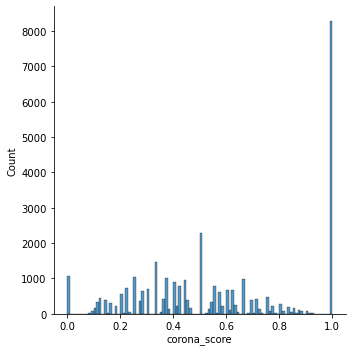

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(guardian["corona_score"],bins=100)
plt.show()

# Independent

In [44]:
independent_words_list = independent['new_title'].tolist()

In [45]:
independent_word_dict = {}
for headline in independent_words_list:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in independent_word_dict:
            independent_word_dict[x] = 1
        else:
            independent_word_dict[x] += 1


In [46]:
 sort_independent = sorted(independent_word_dict.items(), key=lambda x: x[1], reverse=True)

In [47]:
 sort_independent

[('coronaviru', 13659),
 ('trump', 8793),
 ('say', 8556),
 ('two', 6649),
 ('new', 6428),
 ('and', 6295),
 ('thousand', 5942),
 ('one', 5451),
 ('the', 5399),
 ('s', 5356),
 ('twenty', 5116),
 ('covid', 4875),
 ('us', 4482),
 ('uk', 4141),
 ('hundred', 3988),
 ('leagu', 3928),
 ('biden', 3696),
 ('lockdown', 3568),
 ('vs', 3546),
 ('live', 3467),
 ('how', 3410),
 ('vaccin', 2789),
 ('best', 2758),
 ('death', 2689),
 ('johnson', 2641),
 ('govern', 2612),
 ('warn', 2526),
 ('premier', 2525),
 ('polic', 2520),
 ('year', 2517),
 ('bori', 2435),
 ('man', 2393),
 ('time', 2393),
 ('peopl', 2390),
 ('could', 2388),
 ('pandem', 2385),
 ('test', 2380),
 ('five', 2373),
 ('call', 2338),
 ('first', 2273),
 ('day', 2244),
 ('fixtur', 2223),
 ('elect', 2193),
 ('news', 2159),
 ('unit', 2126),
 ('claim', 2097),
 ('face', 2086),
 ('nineteen', 2076),
 ('show', 2057),
 ('home', 1961),
 ('get', 1950),
 ('protest', 1896),
 ('amid', 1864),
 ('back', 1845),
 ('three', 1834),
 ('manchest', 1827),
 ('ten', 1

In [48]:
independent_news_words = []
for entry in sort_independent:
    if entry[1] >= 100:
        independent_news_words.append(entry[0])
len(independent_news_words)

1848

In [49]:
corona_list= ["corona","ons","hancock","whitty","valance","johnson","coronavirus","virus","lockdown","pandemic","epidemic","pcr-test","vaccination","doctor","trace","icu",'itu', "covid","covid-19","vaccination","jab","vaccinate","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]

In [50]:
def corona_related(x):
    x = x.lower()
    temp_list=x.split(' ')
    score=0
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        elif word in list(telegraph_words_articles):
            score+=1
            #print(score)
        else:
            continue
    return score/(len(temp_list))

In [51]:
independent["corona_score"]=independent["new_title"].apply(lambda x: corona_related(x))

<ipython-input-51-a24a239f1fde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent["corona_score"]=independent["new_title"].apply(lambda x: corona_related(x))


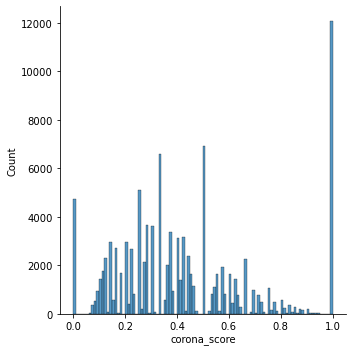

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(independent["corona_score"],bins=100)
plt.show()

## Create new dataframes

In [53]:
covid_independent = independent[independent['corona_score'] > 0.5].reset_index(drop=True)

In [54]:
covid_independent['id'].unique()

array(['news', 'travel', 'sport', 'independentpremium', 'voices',
       'life-style', 'extras', 'arts-entertainment', 'money',
       'environment', '20-pledges', 'video', 'property', 'happylist',
       'climate-change', 'us', 'article-archive', 'health_and_wellbeing',
       'us-election-2020', 'espanol', 'syndication', 'business',
       'business%253A%252011981', 'politics', 'node', 'section%25202',
       'wires', 'weather', 'world', 'independentplus', 'homeless-fund',
       'httpswwwindy100comarticletrumpcoronavirusdrivebywavesupportershospitaltwitterreaction9718121',
       'arts', 'dc-b1719200.html', 'matilda-b1760329.html', 'aidsfree',
       'commercial', 'service', 'hei-fi', 'travel-0', 'incoming',
       'indy100', 'asia', 'arts-entertainment-0'], dtype=object)

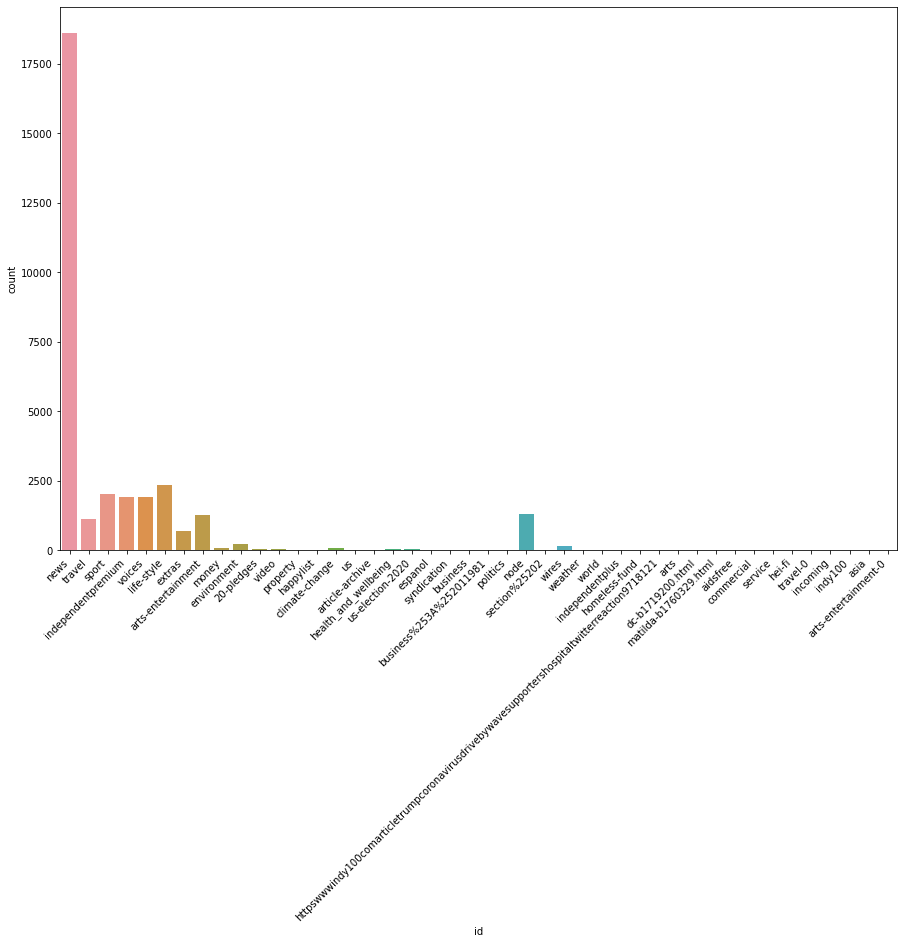

In [55]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="id", data=covid_independent)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [56]:
covid_guardian = guardian[guardian['corona_score'] > 0.5].reset_index(drop=True)

In [57]:
guardian_drop_list = ['sport', 'football', 'books', 'tv-and-radio', 'music', 'stage', 'media', 'artanddesign', 'film', 'food', 'fashion', 'all-in-all-together', 'membership', 'games', 'theobserber', 'go-make-it', 'animals-farmed', 'gnm-press-office', 'education']

In [58]:
covid_guardian = covid_guardian[~covid_guardian.id.isin(guardian_drop_list)]
counts = covid_guardian['id'].value_counts()
covid_guardian = covid_guardian[~covid_guardian['id'].isin(counts[counts < 9].reset_index(drop=True))]
covid_guardian

,title,href,date,new_title,id,corona_score
1,guardian,https://www.theguardian.com/politics/2021/mar/...,2021-03-19,bori johnson receiv oxfordastrazeneca covid va...,politics,1.000000
3,guardian,https://www.theguardian.com/world/2021/feb/19/...,2021-02-19,sceptic oxford vaccin threaten europ s immunis...,world,1.000000
4,guardian,https://www.theguardian.com/world/2021/mar/18/...,2021-03-18,thursday brief EU s expert give oxford vaccin ...,world,1.000000
5,guardian,https://www.theguardian.com/world/2021/mar/16/...,2021-03-16,oxfordastrazeneca vaccin countri paus jab,world,1.000000
6,guardian,https://www.theguardian.com/world/2021/mar/16/...,2021-03-16,chao germani itali suspens oxford vaccin,world,1.000000
...,...,...,...,...,...,...
16012,guardian,https://www.theguardian.com/news/2020/sep/01/f...,2020-09-01,the butcher s shop last three hundred year giv...,news,0.900000
16016,guardian,https://www.theguardian.com/travel/2020/jun/18...,2020-06-18,the end tourism,travel,0.666667
16020,guardian,https://www.theguardian.com/australia-news/liv...,2020-07-14,releas buckingham palac correspond dismiss aus...,australia-news,0.533333
16029,guardian,https://www.theguardian.com/politics/live/2020...,2020-03-09,contain viru extrem unlik work say bori johnso...,politics,1.000000


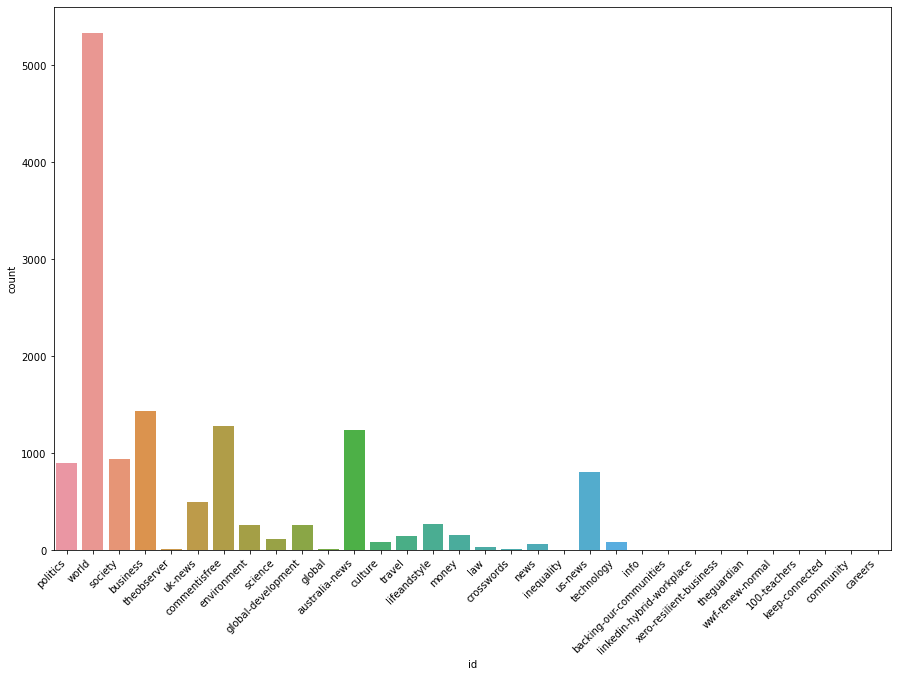

In [59]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="id", data=covid_guardian)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Vaccine

In [60]:
vaccine=["biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","astra-zeneca","oxford","janssen", 'oxfordastrazeneca']


In [61]:
def vaccine_mentioned(x):
    temp_list=x.split(' ')
    for word in temp_list:
        word = word.lower()
        #print(word)
        if word in vaccine:
            return word
        else:
            return "n/a"  

In [62]:
telegraph["vaccine"]=telegraph["new_title"].apply(lambda x: vaccine_mentioned(x))
telegraph["vaccine"].value_counts()

<ipython-input-62-e44b275cc60c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegraph["vaccine"]=telegraph["new_title"].apply(lambda x: vaccine_mentioned(x))


n/a                  22283
oxford                  58
pfizer                  24
astrazeneca             21
moderna                  7
oxfordastrazeneca        1
janssen                  1
Name: vaccine, dtype: int64

In [63]:
covid_guardian["vaccine"]=covid_guardian["new_title"].apply(lambda x: vaccine_mentioned(x))
covid_guardian["vaccine"].value_counts()

n/a                  13900
oxford                  42
astrazeneca             19
pfizer                  10
oxfordastrazeneca        9
moderna                  4
biontech                 1
Name: vaccine, dtype: int64

In [64]:
covid_independent['vaccine'] = covid_independent['new_title'].apply(lambda x: vaccine_mentioned(x))
covid_independent['vaccine'].value_counts()

n/a                  31918
pfizer                  42
oxford                  27
astrazeneca             22
moderna                 15
biontech                 3
oxfordastrazeneca        1
Name: vaccine, dtype: int64

## Create New DataFrame

In [65]:
newspaper_df = pd.concat([covid_guardian, telegraph, covid_independent], axis=0)
newspaper_df

,title,href,date,new_title,id,corona_score,vaccine
1,guardian,https://www.theguardian.com/politics/2021/mar/...,2021-03-19,bori johnson receiv oxfordastrazeneca covid va...,politics,1.000000,n/a
3,guardian,https://www.theguardian.com/world/2021/feb/19/...,2021-02-19,sceptic oxford vaccin threaten europ s immunis...,world,1.000000,n/a
4,guardian,https://www.theguardian.com/world/2021/mar/18/...,2021-03-18,thursday brief EU s expert give oxford vaccin ...,world,1.000000,n/a
5,guardian,https://www.theguardian.com/world/2021/mar/16/...,2021-03-16,oxfordastrazeneca vaccin countri paus jab,world,1.000000,oxfordastrazeneca
6,guardian,https://www.theguardian.com/world/2021/mar/16/...,2021-03-16,chao germani itali suspens oxford vaccin,world,1.000000,n/a
...,...,...,...,...,...,...,...
32023,independent,https://www.independent.co.uk/news/education/e...,2021-03-25,not enough evid stop wear mask secondari schoo...,news,0.538462,n/a
32024,independent,https://www.independent.co.uk/news/world/ameri...,2021-03-25,brett favr reveal almost want kill amid painki...,news,0.555556,n/a
32025,independent,https://www.independent.co.uk/news/reports-say...,2021-03-25,report say cnn s chri cuomo got special covid ...,news,1.000000,n/a
32026,independent,https://www.independent.co.uk/news/uk/home-new...,2021-03-25,univers aberdeen becom one first UK institut r...,news,0.600000,n/a


In [66]:
newspaper_df.vaccine.value_counts()

n/a                  68101
oxford                 127
pfizer                  76
astrazeneca             62
moderna                 26
oxfordastrazeneca       11
biontech                 4
janssen                  1
Name: vaccine, dtype: int64

In [67]:
newspaper_df.to_csv('C:/Users/jw156/Ironhack/vaccine/vaccine_sentiment/english/covid_newspapers.csv')
print("Sucessfully saved")

Sucessfully saved


# Dictionary for newspapers

In [68]:
newspaper_words = newspaper_df['new_title'].tolist()

In [69]:
newspaper_words_dict = {}
for headline in newspaper_words:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in newspaper_words_dict:
            newspaper_words_dict[x] = 1
        else:
            newspaper_words_dict[x] += 1


In [70]:
 sort_newspaper = sorted(newspaper_words_dict.items(), key=lambda x: x[1], reverse=True)

In [71]:
 sort_newspaper

[('coronaviru', 16833),
 ('covid', 13061),
 ('lockdown', 7745),
 ('s', 6237),
 ('uk', 6224),
 ('nineteen', 5973),
 ('and', 5892),
 ('say', 5717),
 ('thousand', 5416),
 ('two', 5341),
 ('one', 5124),
 ('hundred', 4644),
 ('new', 4638),
 ('vaccin', 4616),
 ('twenty', 4293),
 ('johnson', 4177),
 ('the', 3887),
 ('bori', 3792),
 ('trump', 3646),
 ('us', 3541),
 ('test', 3393),
 ('govern', 3245),
 ('warn', 3124),
 ('could', 2891),
 ('pandem', 2493),
 ('death', 2435),
 ('peopl', 2403),
 ('case', 2397),
 ('home', 2192),
 ('face', 2138),
 ('five', 2118),
 ('how', 2072),
 ('year', 1853),
 ('get', 1851),
 ('day', 1840),
 ('rule', 1839),
 ('first', 1776),
 ('england', 1773),
 ('plan', 1755),
 ('news', 1742),
 ('crisi', 1734),
 ('time', 1718),
 ('live', 1690),
 ('nh', 1681),
 ('back', 1667),
 ('amid', 1638),
 ('travel', 1619),
 ('school', 1602),
 ('three', 1591),
 ('need', 1563),
 ('may', 1534),
 ('rise', 1489),
 ('report', 1485),
 ('help', 1475),
 ('health', 1455),
 ('work', 1446),
 ('viru', 1443